In [1]:
tar = 'http://torch7.s3-website-us-east-1.amazonaws.com/data/mnist.t7.tgz'
if not paths.dirp('minst.t7') then
    os.execute('wget ' .. tar)
    os.execute('tar xvf ' .. paths.basename(tar))
end

In [2]:
train_file = 'mnist.t7/train_32x32.t7'
test_file = 'mnist.t7/train_32x32.t7'

In [16]:
trainData = torch.load(train_file, 'ascii')
testData = torch.load(test_file, 'ascii')
trainData.data = trainData.data:double()
mean = trainData.data[{ {}, {1}, {}, {}  }]:mean()
print('Channel 1, Mean: ' .. mean)
trainData.data[{ {}, {1}, {}, {}  }]:add(-mean)
    
stdv = trainData.data[{ {}, {1}, {}, {}  }]:std()
print('Channel 1, Standard Deviation: ' .. stdv)
trainData.data[{ {}, {1}, {}, {}  }]:div(stdv)

Channel 1, Mean: 25.509416422526	


Channel 1, Standard Deviation: 70.180423838273	


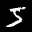

In [6]:
itorch.image(trainData.data[1])

In [7]:
dataset = {}
function dataset:size() return 60000 end
for i=1,dataset:size() do
    output = torch.zeros(10)
    output[trainData.labels[i]] = 1
    dataset[i] = {torch.reshape(trainData.data[i][1], 1, 32*32):double(), torch.reshape(output, 1, 10)}
end

testdataset = {}
function testdataset:size() return 60000 end
for i=1,testdataset:size() do
    output = torch.zeros(10)
    output[testData.labels[i]] = 1
    testdataset[i] = {torch.reshape(trainData.data[i][1], 1, 32*32):double(), torch.reshape(output, 1, 10)}
end

In [8]:
require 'cltorch'
require 'clnn'
mlp = nn.Sequential()
mlp:add(nn.Linear(32*32,256))
mlp:add(nn.Tanh())
mlp:add(nn.Linear(256,128))
mlp:add(nn.Tanh())
mlp:add(nn.Linear(128, 10))

criterion = nn.MSECriterion()
trainer = nn.StochasticGradient(mlp, criterion)
trainer.learningRate = 0.1
trainer.maxIteration = 25
trainer:train(dataset)

libthclnn_searchpath	/Users/reed/torch/install/lib/lua/5.1/libTHCLNN.so	


# StochasticGradient: training	


# current error = 0.015292126041745	


# current error = 0.0075404112911862	


# current error = 0.0056163857053765	


# current error = 0.0044903124104875	


# current error = 0.0037283736150367	


# current error = 0.0032316779094814	


# current error = 0.0027920564341961	


# current error = 0.002444271927749	


# current error = 0.0021593730525434	


# current error = 0.0019037602763539	


# current error = 0.0017021718187602	


# current error = 0.0015357843629213	


# current error = 0.0013820484758115	


# current error = 0.0012609513601651	


# current error = 0.0011582780891667	


# current error = 0.0010723516769401	


# current error = 0.00096323029714427	


# current error = 0.00090993393669897	


# current error = 0.00084923695558401	


# current error = 0.00078962452472501	


# current error = 0.00076590470259305	


# current error = 0.00070078570923359	


# current error = 0.00065654495207932	


# current error = 0.00060599382308095	


# current error = 0.00059054845679944	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.00059054845679944	


Guess:3 Actual: 3	


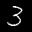

Guess:7 Actual: 7	


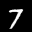

Guess:2 Actual: 2	


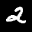

Guess:7 Actual: 7	


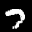

Guess:8 Actual: 8	


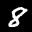

Guess:7 Actual: 7	


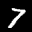

Guess:5 Actual: 5	


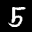

Guess:3 Actual: 3	


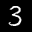

Guess:1 Actual: 1	


Guess:5 Actual: 5	


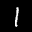

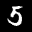

Guess:1 Actual: 1	


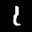

Guess:9 Actual: 9	


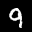

Guess:9 Actual: 9	


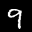

Guess:3 Actual: 3	


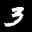

Guess:9 Actual: 9	


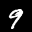

Guess:2 Actual: 2	


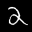

Guess:1 Actual: 1	


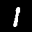

Guess:0 Actual: 0	


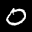

Guess:5 Actual: 5	


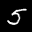

Guess:6 Actual: 6	


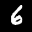

Guess:2 Actual: 2	


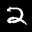

Guess:1 Actual: 1	


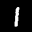

Guess:4 Actual: 5	
WRONG!!!	


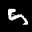

Guess:0 Actual: 0	


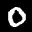

Guess:3 Actual: 3	


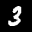

Guess:3 Actual: 3	


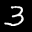

Guess:4 Actual: 4	


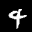

Guess:0 Actual: 0	


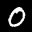

Guess:6 Actual: 6	


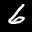

Guess:1 Actual: 1	


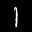

Guess:5 Actual: 5	


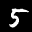

Guess:4 Actual: 4	


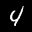

Guess:1 Actual: 1	


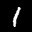

Guess:7 Actual: 7	


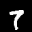

Guess:9 Actual: 9	


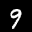

Guess:1 Actual: 1	


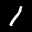

Guess:1 Actual: 1	


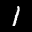

Guess:8 Actual: 8	


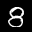

Guess:9 Actual: 9	


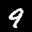

Guess:5 Actual: 5	


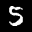

Guess:2 Actual: 2	


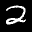

Guess:6 Actual: 6	


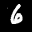

Guess:4 Actual: 4	


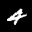

Guess:6 Actual: 6	


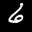

Guess:0 Actual: 0	


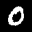

Guess:4 Actual: 4	


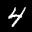

Guess:3 Actual: 3	


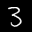

Guess:7 Actual: 7	


Guess:5 Actual: 5	


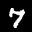

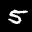

Guess:1 Actual: 1	


Guess:4 Actual: 4	


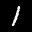

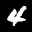

Guess:9 Actual: 9	


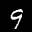

Guess:0 Actual: 0	


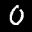

Guess:8 Actual: 8	


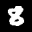

Guess:1 Actual: 1	


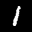

Guess:0 Actual: 0	


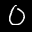

Guess:6 Actual: 6	


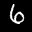

Guess:1 Actual: 1	


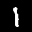

Guess:1 Actual: 1	


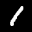

Guess:3 Actual: 3	


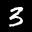

Guess:8 Actual: 8	


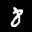

Guess:1 Actual: 1	


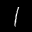

Guess:0 Actual: 0	


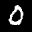

Guess:1 Actual: 1	


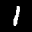

Guess:7 Actual: 7	


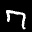

Guess:8 Actual: 8	


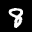

Guess:6 Actual: 6	


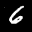

Guess:5 Actual: 5	


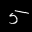

Guess:7 Actual: 7	


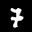

Guess:2 Actual: 2	


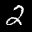

Guess:6 Actual: 6	


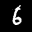

Guess:0 Actual: 0	


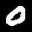

Guess:7 Actual: 7	


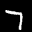

Guess:7 Actual: 7	


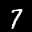

Guess:7 Actual: 7	


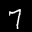

Guess:7 Actual: 7	


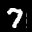

Guess:0 Actual: 0	


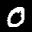

Guess:7 Actual: 7	


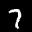

Guess:4 Actual: 4	


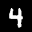

Guess:3 Actual: 3	


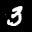

Guess:8 Actual: 8	


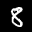

Guess:0 Actual: 0	


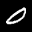

Guess:0 Actual: 0	


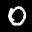

Guess:9 Actual: 9	


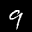

Guess:4 Actual: 4	


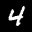

Guess:5 Actual: 5	


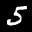

Guess:0 Actual: 0	


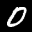

Guess:0 Actual: 0	


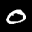

Guess:2 Actual: 2	


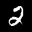

Guess:4 Actual: 4	


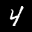

Guess:3 Actual: 3	


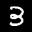

Guess:1 Actual: 1	


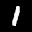

Guess:5 Actual: 5	


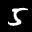

Guess:9 Actual: 9	


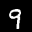

Guess:1 Actual: 1	


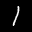

Guess:8 Actual: 8	


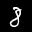

Guess:8 Actual: 8	


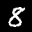

Guess:6 Actual: 6	


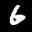

Guess:3 Actual: 3	


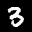

Guess:0 Actual: 0	


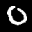

Out of 100 we got 1 wrong	


In [19]:
function max(t)
    local storage = t:storage()
    local key, value = 1, storage[1]
    for i = 2,storage:size() do
        if value < storage[i] then
            key, value = i, storage[i]
        end
    end
    return key, value
end

local wrong = 0
local images = 100
for j=1,images do
    local i = math.random(60000-1)
    local t = mlp:forward(testdataset[i][1])
    local guess = max(t)
    local actual = testData.labels[i]
    print("Guess:" .. (guess - 1) .. " Actual: " .. (actual - 1))
    if actual == guess then
        itorch.image(trainData.data[i])
    else
        print("WRONG!!!")
        itorch.image(trainData.data[i])
        wrong = wrong + 1
    end
end

print("Out of " .. images .. " we got " .. wrong .. " wrong")